In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor


# 读取数据
X_train = pd.read_csv('train_encode.csv')
X_val = pd.read_csv('test_encode.csv').sort_values(by=['unique_id', 'date'])

In [2]:
# X_train = X_train.drop(['holiday_name_encoded', 'year_encoded'], axis=1)
# X_val = X_val.drop(['holiday_name_encoded', 'year_encoded'], axis=1)

In [2]:
train_unid = X_train['unique_id']
val_unid = X_val['unique_id']
train_date = X_train['date']
val_date = X_val['date']

y_train = X_train['sales']
X_train.drop(['sales','unique_id','date'], axis=1, inplace=True)
X_val.drop(['unique_id','date'], axis=1, inplace=True)

X_train.shape, X_val.shape

((4007367, 32), (47021, 32))

In [4]:
import lightgbm as lgb
# 创建 LightGBM 数据集
train_data = lgb.Dataset(X_train, label=y_train)

# # 定义 LightGBM 参数
# params = {
#     'boosting_type': 'gbdt',          # 提升类型：gbdt（梯度提升决策树）
#     'objective': 'regression',        # 目标函数：回归任务
#     'metric': 'rmse',                 # 评估指标：均方根误差
#     'num_leaves': 300,                 # 每棵树的最大叶子数
#     'learning_rate': 0.05,            # 学习率
#     'feature_fraction': 0.8,          # 每次迭代时随机选择 90% 的特征
#     'bagging_fraction': 0.8,          # 每次迭代时随机选择 80% 的数据
#     'bagging_freq': 10,                # 每 5 次迭代进行一次 bagging
#     'verbose': -1,                    # 不输出日志信息
#     'seed': 42,                       # 随机种子
#     'num_threads': -1,                # 使用所有可用的 CPU 核心
#     'max_depth': 80,                  # 树的最大深度，-1 表示不限制
#     'min_data_in_leaf': 5,           # 叶节点最小样本数
#     'lambda_l1': 0.5,                 # L1 正则化
#     'lambda_l2': 0.5,                 # L2 正则化
#     'device': 'gpu',                  # 使用 CPU 或 GPU（设置为 'gpu' 以启用 GPU 加速）
# }

params = {
    'boosting_type': 'gbdt',          # 提升类型：gbdt（梯度提升决策树）
    'objective': 'regression',        # 目标函数：回归任务
    'metric': 'mae',                 # 评估指标：均方根误差
    'num_leaves': 500,                 # 每棵树的最大叶子数
    'learning_rate': 0.08,            # 学习率
    'feature_fraction': 0.8,          # 每次迭代时随机选择 90% 的特征
    'bagging_fraction': 0.8,          # 每次迭代时随机选择 80% 的数据
    'bagging_freq': 10,                # 每 5 次迭代进行一次 bagging
    'verbose': -1,                    # 不输出日志信息
    'seed': 42,                       # 随机种子
    'num_threads': -1,                # 使用所有可用的 CPU 核心
    'max_depth': None,                  # 树的最大深度，-1 表示不限制
    'min_data_in_leaf': 5,           # 叶节点最小样本数
    'lambda_l1': 1,                 # L1 正则化
    'lambda_l2': 0.5,                 # L2 正则化
    'device': 'gpu',                  # 使用 CPU 或 GPU（设置为 'gpu' 以启用 GPU 加速）
}
# 训练模型
num_round = 1000  # 迭代次数
model = lgb.train(
    params,
    train_data,
    num_round,
)
# 保存模型（可选）
model.save_model('lightgbm_model.txt')

In [5]:
# import xgboost as xgb

# # 将数据转换为 DMatrix 格式（XGBoost 的高效数据结构）
# dtrain = xgb.DMatrix(X_train, label=y_train)

# # 设置参数
# params = {
#     'objective': 'reg:squarederror',
#     'learning_rate': 0.015,
#     'max_depth': 20,
#     'min_child_weight': 5,
#     'gamma': 5,
#     'alpha': 1,
#     'lambda': 0.5,
#     'subsample': 0.8,
#     'colsample_bytree': 0.8,
#     'tree_method': 'hist',
#     'device': 'cuda',
#     'max_bin': 512,  # 设置最大分桶数量
#     'n_jobs': -1,
#     'seed': 42
# }

# # 训练模型
# num_boost_round = 560  # 迭代次数
# model = xgb.train(
#     params,
#     dtrain,
#     num_boost_round=num_boost_round
# )

# model.save_model('xgboost_xgb4.model')

In [6]:
# import xgboost as xgb
# # 加载模型
# model = xgb.Booster()
# model.load_model('xgboost_train.model')

In [3]:
import lightgbm as lgb

# 加载模型
model = lgb.Booster(model_file='lightgbm_model.txt')

In [4]:
# 对测试集进行预测（假设 x_test 是你的测试数据）
# X_val = xgb.DMatrix(X_val) #xgb

predictions = model.predict(X_val)
predictions

array([110.49202472, 100.49929025, 112.04230696, ...,  14.34249129,
        24.5227567 ,  27.64935957])

In [5]:
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# 计算分位数
bins = np.quantile(predictions, [0.33, 0.66])

# 将目标变量分为低、中、高三个区间
y_val_binned = np.digitize(predictions, bins)

# 输出区间范围
print(f'Low range: predictions < {bins[0]:.2f}')
print(f'Mid range: {bins[0]:.2f} <= predictions < {bins[1]:.2f}')
print(f'High range: predictions >= {bins[1]:.2f}')




Low range: predictions < 29.75
Mid range: 29.75 <= predictions < 72.26
High range: predictions >= 72.26


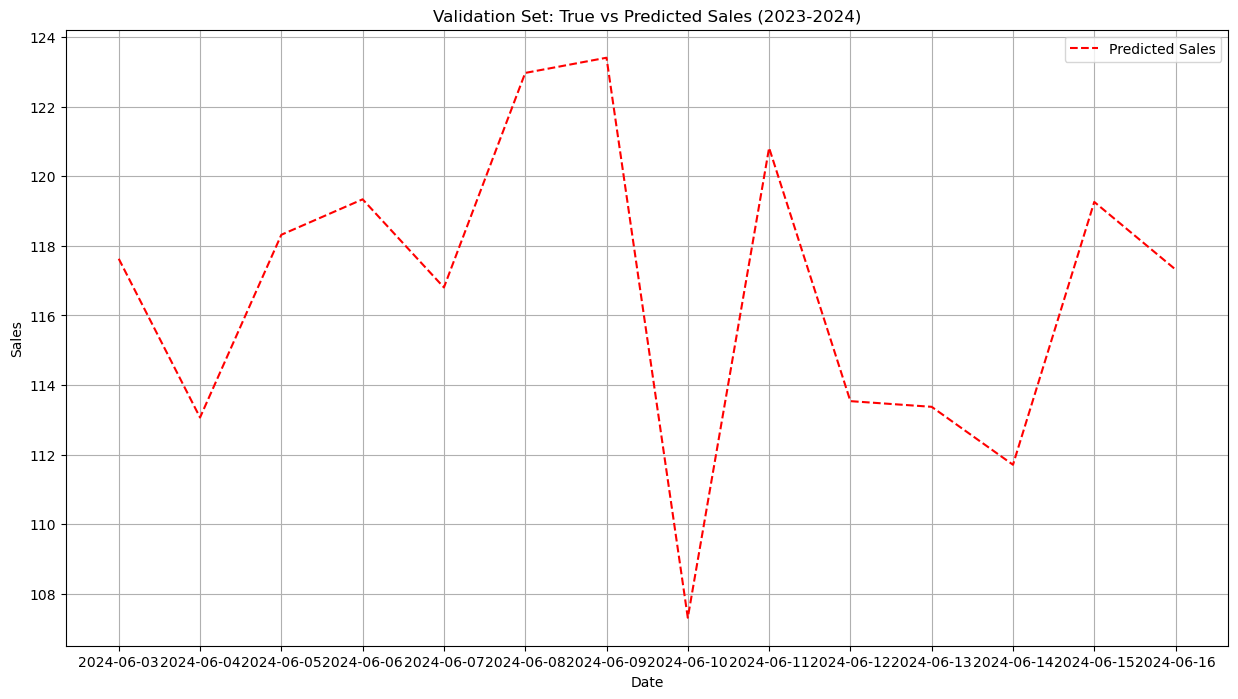

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 绘制图形
plt.figure(figsize=(15, 8))
# 将 predictions 数组转换为 DataFrame
predictions_df = pd.DataFrame({'sales_hat': predictions})

predictions_df['date'] = val_date

val2_avg = predictions_df.groupby('date')['sales_hat'].mean().reset_index()

# 绘制第一个验证集的预测销售数据（红色虚线）
sns.lineplot(data=val2_avg, x='date', y='sales_hat', color='red', linestyle='--', label='Predicted Sales')

# 添加标题和标签
plt.title('Validation Set: True vs Predicted Sales (2023-2024)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()

In [7]:
# 将预测结果、val_unid 和 val_date 组合成一个 DataFrame
submission_df = pd.DataFrame({
    'id': [f"{unid}_{date}" for unid, date in zip(val_unid, val_date)],  # 组合 unique_id 和 date
    'sales_hat': predictions  # 预测结果
})

# 确保列名和格式正确
submission_df.columns = ['id', 'sales_hat']

# 保存为 submission.csv
submission_df.to_csv('submission4.csv', index=False)

# 打印前几行以检查格式
submission_df.head()

,id,sales_hat
0,1_2024-06-03,110.492025
1,1_2024-06-04,100.499290
2,1_2024-06-05,112.042307
3,1_2024-06-06,116.681264
4,1_2024-06-07,131.940058
